# Teste de todos os modelos de Regressão

In [572]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


### Utilizando Arquivo Pickle

In [573]:
with open('dados_modelos/estimador_reg_lin.pickle', 'rb') as f:
    estimador = pickle.load(f)

In [574]:
df = pd.read_csv('dados_modelos/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [576]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

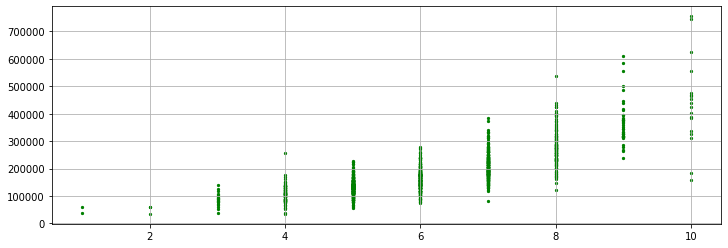

In [577]:
plt.figure(figsize=(12,4))
plt.scatter(x=df['OverallQual'],y=df['SalePrice'], c='green', s=5)
plt.grid()
# categorico...

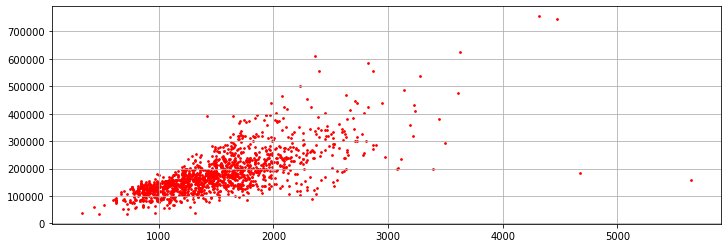

In [578]:
plt.figure(figsize=(12,4))
plt.scatter(x=df['GrLivArea'],y=df['SalePrice'], s=3, c='red')
plt.grid()
#continua!

In [579]:
df.dropna(axis=1, inplace=True)
df.shape


(1460, 62)

In [580]:
df.dropna(axis=0, inplace=True)
df.shape

(1460, 62)

In [581]:
X= df['GrLivArea']
y= df['SalePrice']

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

In [583]:
estimador.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [584]:
y_pred_pickle = estimador.predict(np.array(X_test).reshape(-1,1))

(0.0, 500000.0)

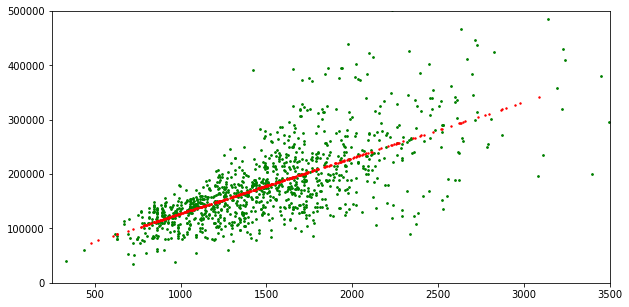

In [585]:
plt.figure(figsize=(10,5))
plt.scatter(X_train ,y_train, s=3, c='green')
plt.scatter(X_test,y_pred_pickle, s=2, c='red')
plt.xlim(250,3500)
plt.ylim(0,500000)

In [586]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred_pickle)

print(f'R2 {r2:.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred_pickle):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred_pickle, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred_pickle) * 100:.2f}')

R2 0.55
MAE 37052.45
RMSE 55843.06
MAPE 22.25


### Regressão Linear Simples

In [587]:
estimador_reg_lin = LinearRegression()
estimador_reg_lin.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred_reg_lin = estimador_reg_lin.predict(np.array(X_test).reshape(-1,1))

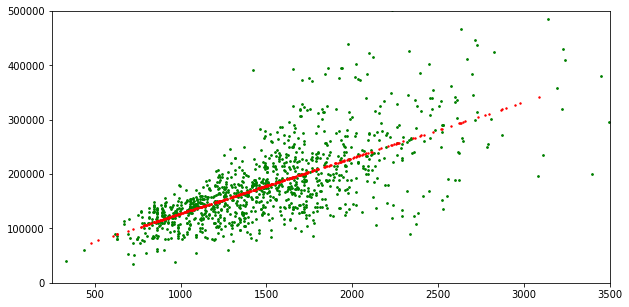

In [588]:
plt.figure(figsize=(10,5))
plt.scatter(X_train ,y_train, s=3, c='green')
plt.scatter(X_test,y_pred_reg_lin, s=2, c='red')
plt.xlim(250,3500)
plt.ylim(0,500000);

In [589]:
r2 = r2_score(y_test, y_pred_reg_lin)

print(f'R2 {r2:.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred_reg_lin):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred_reg_lin, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred_reg_lin) * 100:.2f}')

R2 0.55
MAE 37052.45
RMSE 55843.06
MAPE 22.25


### Regressão Linear Múltipla

In [590]:
df.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [591]:
X= df[['GrLivArea', 'GarageArea']]
y= df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

In [592]:
estimador_reg_lin_mult = LinearRegression()
estimador_reg_lin_mult.fit(X_train, y_train)
y_pred_reg_lin_mult = estimador_reg_lin_mult.predict(X_test)
X_test.shape

(365, 2)

Text(0.5, 0, 'SalePrice')

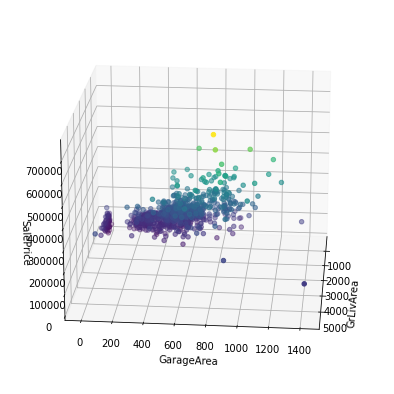

In [593]:
plt.figure(figsize=[7,7])
ax = plt.axes(projection='3d')
ax.scatter(X_train['GrLivArea'], X_train['GarageArea'] ,y_train, c=y_train, cmap='viridis')
ax.view_init(20, 5)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_zlabel('SalePrice')


In [594]:
print(f'R2 {r2_score(y_test, y_pred_reg_lin_mult):.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred_reg_lin_mult):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred_reg_lin_mult, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred_reg_lin_mult) * 100:.2f}')

R2 0.66
MAE 31130.73
RMSE 48731.14
MAPE 19.17


### Regressão Logística

In [595]:
df = pd.read_csv('dados_modelos/advertising.csv')

In [596]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [598]:
df = df.select_dtypes(include= np.number)

In [599]:
X = df.drop(columns='Clicked on Ad')
y= df['Clicked on Ad']

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.25)

In [601]:
estimador = LogisticRegression()
estimador.fit(X_train, y_train)

LogisticRegression()

In [602]:
y_pred = estimador.predict(X_test)
y_proba= estimador.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       120
           1       0.97      0.81      0.88       130

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



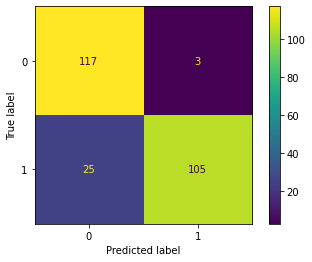

In [603]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);


In [604]:
def precision_recall_widgets(cutoff=0.5):
    proba_1 = estimador.predict_proba(X_test)[:, 1]

    y_pred = np.where(proba_1 >= cutoff, 1, 0)
    y_pred
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    df = pd.DataFrame(report).round(2)
    
    plt.figure(figsize=(10,5))
    plt.table(cellText=df.values, colLabels=df.columns, loc='center')
    

In [605]:
import ipywidgets as widgets
widgets.interact(precision_recall_widgets, cutoff=(0.1, 0.9, 0.01));

interactive(children=(FloatSlider(value=0.5, description='cutoff', max=0.9, min=0.1, step=0.01), Output()), _d…

In [606]:
print(f'R2 {r2_score(y_test, y_pred):.2f}')
print(f'MAE {mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE {mean_squared_error(y_test, y_pred, squared=False):.2f}')
print(f'MAPE {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}')

R2 0.55
MAE 0.11
RMSE 0.33
MAPE 5404319552844605.00


### Features Polinomiais

In [607]:
df = pd.read_csv('dados_modelos/auto-mpg.csv')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [608]:
polinomio = PolynomialFeatures(2)

In [609]:
df_temp = df.select_dtypes(include=np.number).dropna(axis='rows').copy()
df_temp.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [610]:
X= df_temp.drop(columns='MPG')
y= df_temp['MPG']

In [611]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [612]:
corr_feat_target = pd.concat([X_train, y_train], axis=1).corr()

In [613]:
corr_feat_target['MPG'].abs().sort_values(ascending=False)

MPG             1.000000
Weight          0.835568
Displacement    0.811580
Horsepower      0.782381
Cylinders       0.780555
Model Year      0.590454
Origin          0.569064
Acceleration    0.412048
Name: MPG, dtype: float64

In [614]:
# X_train = X_train.drop(columns=['Cylinders', 'Origin', 'Model Year', 'Acceleration'])
# X_test = X_test[X_train.columns]

In [615]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
260,6,225.0,110.0,3620.0,18.7,78,1
184,4,140.0,92.0,2572.0,14.9,76,1
174,6,171.0,97.0,2984.0,14.5,75,1
64,8,318.0,150.0,4135.0,13.5,72,1
344,4,86.0,64.0,1875.0,16.4,81,1
...,...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72,1
107,6,232.0,100.0,2789.0,15.0,73,1
272,4,151.0,85.0,2855.0,17.6,78,1
352,4,98.0,65.0,2380.0,20.7,81,1


In [616]:
polinomio.fit(X_train)
X_treino_transf = pd.DataFrame(polinomio.transform(X_train))

In [617]:
estimador_transf = LinearRegression()
estimador_transf.fit(X_treino_transf, y_train)

LinearRegression()

In [618]:
estimador_transf.coef_

array([ 2.07180044e+06,  1.44777499e+01, -6.84219597e-01,  4.81424995e-02,
        1.95418153e-02, -8.80516355e+00, -6.87818821e+00, -1.77559681e+01,
       -8.25888599e-01,  1.29330670e-02,  1.30767780e-02,  1.18568996e-03,
        3.18792775e-01, -2.43969602e-01,  9.39259529e-01, -1.56532869e-04,
        3.75914951e-04,  1.14607316e-05, -2.13586148e-03,  8.26782093e-03,
       -2.71160805e-03, -5.00174360e-05, -4.53820752e-05, -4.21124613e-03,
       -7.57925594e-04,  2.92716853e-03,  3.77811825e-07, -1.03182376e-07,
       -4.14977940e-04,  9.55060752e-04,  2.97617757e-02,  8.13148898e-02,
        3.74392422e-01,  4.77585879e-02,  9.32825698e-02, -1.94705591e-01])

In [619]:
polinomio_teste = PolynomialFeatures(2)
polinomio_teste.fit(X_test)
X_test_transf = pd.DataFrame(polinomio_teste.transform(X_test))

In [620]:
y_pred = estimador_transf.predict(X_test_transf)

In [621]:
r2_score(y_test, y_pred)

0.8602489053234482

In [622]:
X_test_transf

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,4.0,96.0,69.0,2189.0,18.0,72.0,2.0,16.0,384.0,...,4791721.0,39402.0,157608.0,4378.0,324.00,1296.0,36.0,5184.0,144.0,4.0
1,1.0,4.0,121.0,115.0,2795.0,15.7,78.0,2.0,16.0,484.0,...,7812025.0,43881.5,218010.0,5590.0,246.49,1224.6,31.4,6084.0,156.0,4.0
2,1.0,4.0,91.0,60.0,1800.0,16.4,78.0,3.0,16.0,364.0,...,3240000.0,29520.0,140400.0,5400.0,268.96,1279.2,49.2,6084.0,234.0,9.0
3,1.0,4.0,91.0,70.0,1955.0,20.5,71.0,1.0,16.0,364.0,...,3822025.0,40077.5,138805.0,1955.0,420.25,1455.5,20.5,5041.0,71.0,1.0
4,1.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,16.0,560.0,...,7784100.0,43524.0,228780.0,2790.0,243.36,1279.2,15.6,6724.0,82.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1.0,6.0,225.0,85.0,3465.0,16.6,81.0,1.0,36.0,1350.0,...,12006225.0,57519.0,280665.0,3465.0,275.56,1344.6,16.6,6561.0,81.0,1.0
75,1.0,4.0,98.0,80.0,2164.0,15.0,72.0,1.0,16.0,392.0,...,4682896.0,32460.0,155808.0,2164.0,225.00,1080.0,15.0,5184.0,72.0,1.0
76,1.0,8.0,350.0,145.0,4082.0,13.0,73.0,1.0,64.0,2800.0,...,16662724.0,53066.0,297986.0,4082.0,169.00,949.0,13.0,5329.0,73.0,1.0
77,1.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,64.0,2432.0,...,11785489.0,41196.0,240310.0,3433.0,144.00,840.0,12.0,4900.0,70.0,1.0


In [623]:
X_test.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Origin'],
      dtype='object')

<AxesSubplot:xlabel='Weight', ylabel='MPG'>

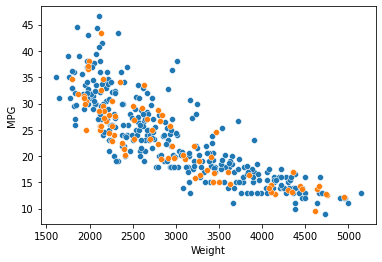

In [624]:
sns.scatterplot(x=X_train['Weight'], y=y)
sns.scatterplot(x=X_test['Weight'], y=y_pred.flatten())

### Avaliando o impacto de cada feature no desempenho do modelo

In [628]:
correlacoes_ordenadas = pd.concat([X_train, y_train], axis=1).corr()['MPG'].abs().sort_values(ascending=False)
correlacoes_ordenadas

MPG             1.000000
Weight          0.835568
Displacement    0.811580
Horsepower      0.782381
Cylinders       0.780555
Model Year      0.590454
Origin          0.569064
Acceleration    0.412048
Name: MPG, dtype: float64

In [641]:
features_ordenadas = correlacoes_ordenadas.index[1:]
features_ordenadas

Index(['Weight', 'Displacement', 'Horsepower', 'Cylinders', 'Model Year',
       'Origin', 'Acceleration'],
      dtype='object')

In [625]:
def treino_avaliacao_test(X_train, y_train, X_test, y_test):
    estimador = LinearRegression()
    estimador.fit(X_train, y_train)

    # aqui deveriamos ter um cross validation
    y_pred_train = estimador.predict(X_train)
    erro_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = estimador.predict(X_test)
    erro_test = mean_absolute_error(y_test, y_pred_test)
    
    r2 = r2_score(y_test, y_pred_test)
    
    return erro_train, erro_test, r2

In [633]:
resultados_treinos = []
qtde_features = len(features_ordenadas)

for i in range(1, qtde_features+1):
    resultados_treinos.append(
        treino_avaliacao_test(
            X_train[features_ordenadas[:i]],
            y_train,
            X_test[features_ordenadas[:i]],
            y_test
        )
    )

df_resultados_treinos = pd.DataFrame(resultados_treinos, columns=['erro_train', 'erro_test', 'r2'])
df_resultados_treinos.head()

,erro_train,erro_test,r2
0,3.285511,3.464121,0.653347
1,3.256007,3.492737,0.641312
2,3.224349,3.511087,0.647067
3,3.223515,3.488191,0.649457
4,2.668521,2.502471,0.793165


<AxesSubplot:>

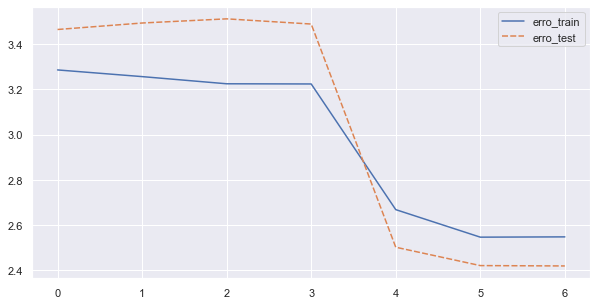

In [634]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos[['erro_train', 'erro_test']])

<AxesSubplot:>

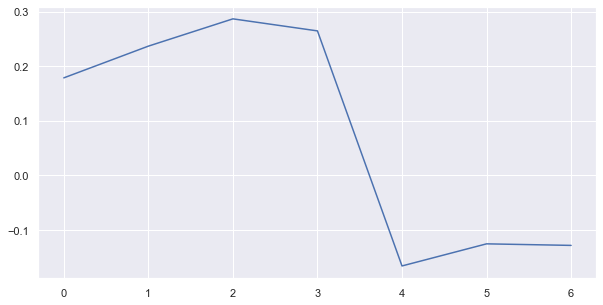

In [635]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos['erro_test'] - df_resultados_treinos['erro_train'])

<AxesSubplot:>

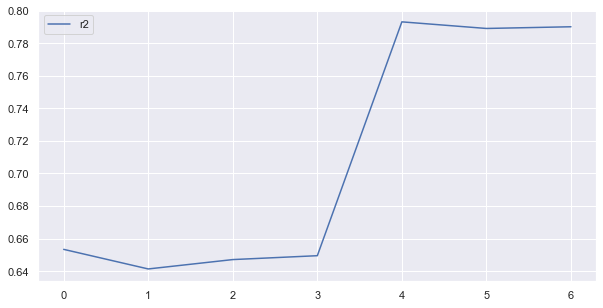

In [636]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos[['r2']])

In [637]:
def treino_avaliacao_test(X_train, y_train, X_test, y_test):
    estimador = LinearRegression()
    estimador.fit(X_train, y_train)

    # aqui deveriamos ter um cross validation
    y_pred_train = estimador.predict(X_train)
    erro_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = estimador.predict(X_test)
    erro_test = mean_absolute_error(y_test, y_pred_test)
    
    r2 = r2_score(y_test, y_pred_test)
    r2_ajustado = 1 - (1-r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    
    return erro_train, erro_test, r2, r2_ajustado

<AxesSubplot:>

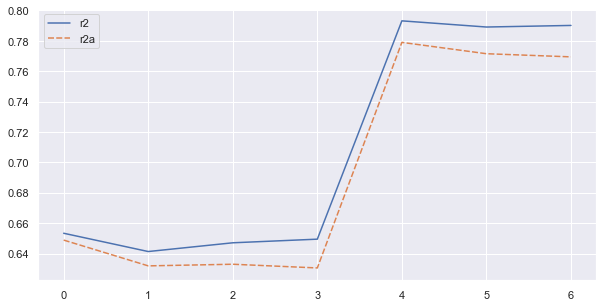

In [646]:
resultados_treinos = []

for i in range(1, qtde_features+1):
    resultados_treinos.append(
        treino_avaliacao_test(
            X_train[features_ordenadas[:i]],
            y_train,
            X_test[features_ordenadas[:i]],
            y_test
        )
    )

df_resultados_treinos = pd.DataFrame(resultados_treinos, columns=['erro_train', 'erro_test', 'r2', 'r2a'])

sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.xticks(df_resultados_treinos.index)
sns.lineplot(data=df_resultados_treinos[['r2', 'r2a']])

#labels=['Weight', 'Displacement', 'Horsepower', 'Cylinders', 'Model Year', 'Origin', 'Acceleration'])